In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
fpp_all = pd.read_csv('fpp_final_table.csv', index_col=0)
fpp_all.count()

koi.1                    8826
rprs                     7525
secthresh                7525
maxrad                   7525
pr_heb                   7242
pr_eb                    7242
pr_beb                   7242
L_tot                    7370
fp                       7370
FPP                      7242
rp                       7431
disposition              8826
prob_ontarget            6787
pos_prob_score           7470
not_transitlike          8826
significant_secondary    8826
centroid_offset          8826
ephem_match              8826
exception                1456
dtype: int64

In [2]:
#4115.01 -- variable star?  rprs too big

fpp_all.ix['K00087.01']

koi.1                    K00087.01
rprs                         0.022
secthresh                       98
maxrad                        1.05
pr_heb                    4.11e-08
pr_eb                       0.0108
pr_beb                    3.11e-05
L_tot                       0.6955
fp                           0.218
FPP                         0.0108
rp                        2.243069
disposition              CONFIRMED
prob_ontarget                    1
pos_prob_score                   1
not_transitlike              False
significant_secondary        False
centroid_offset              False
ephem_match                  False
exception                      NaN
Name: K00087.01, dtype: object

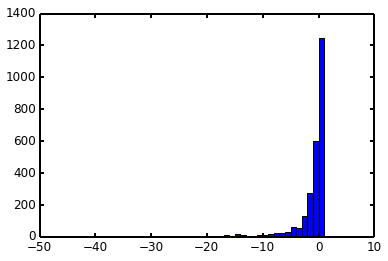

In [3]:
ok = fpp_all['L_tot'] > 0
plt.hist(np.log10(fpp_all[ok]['L_tot']), bins=range(-50,2));

In [4]:
confirmed = fpp_all['disposition'] == 'CONFIRMED'
known_fp = fpp_all['disposition'] == 'FALSE POSITIVE'
candidate = fpp_all['disposition'] == 'CANDIDATE'
low_fpp = fpp_all['FPP'] < 0.01
high_fpp = fpp_all['FPP'] > 0.9
on_target = fpp_all['prob_ontarget'] > 0.99

fpp_calculated = fpp_all[np.isfinite(fpp_all['FPP']) & np.isfinite(fpp_all['rp'])]
d = fpp_calculated

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def fpp_summaryplot(data=fpp_calculated,fig=None,symbol='o',ms=1,color='k',
                    markrs=[1,1.5,2,2.5,3,4,10],nbins=15,alpha=0.5,
                    title=None,hlineval=0.01,labelpos=(0.8,0.08),
                    summarylabel=True,erasedata=None,titlefontsize=20,
                    titlexy=(0.25,0.85), **kwargs):
    
    data = data.sort('rp')
    inds = np.arange(len(data))
    data.index = inds
    
    ypts = data['FPP'].clip(1e-4,1)
    xpts = np.arange(len(data))
    plt.semilogy(ypts,symbol,ms=ms,color=color,alpha=alpha,**kwargs)
        
    if erasedata is not None:
        plt.semilogy(ypts,symbol,ms=ms,color=color,alpha=alpha,**kwargs)

    plt.ylim(ymin=8e-5)
    xmax = inds.max()+1
    plt.xlim(xmax=xmax)
    plt.xticks([])

    ax = plt.gca()

    plt.axhline(hlineval,color='k',lw=2)

    for r in markrs:
        i = np.argmin(np.absolute(data['rp'][inds]-r))
        ax.axvline(i,color='k',lw=3,ls=':')
        ax.annotate(r'%.1f' % r,xy=(float(i)/xmax,-0.05),xycoords='axes fraction',ha='center',
                    annotation_clip=False,fontsize=14)
        

    if nbins is not None:
        N = len(ypts)
        binsize = N/nbins
        xbins = []
        ybins = []
        yerrs = []
        for i in range(nbins):
            xbins.append((xpts[i*binsize:(i+1)*binsize]).mean())
            ybins.append(np.median(ypts[i*binsize:(i+1)*binsize]))
            yerrs.append((ypts[i*binsize:(i+1)*binsize]).std())
        #plt.errorbar(xbins,ybins,yerr=yerrs,color=linecolor,fmt='o',ms=5)
        plt.plot(xbins,ybins,'wo',ms=15)
        plt.plot(xbins,ybins,'ko',ms=13)
        plt.plot(xbins,ybins,'ro',ms=12)

    plt.xlabel('Planet Radius [$R_\oplus$]',labelpad=30)
    plt.ylabel('False Positive Probability')

    if title is not None:
        plt.annotate(title,xy=titlexy,xycoords='axes fraction',
                     fontsize=titlefontsize,
                     bbox=dict(boxstyle='round',fc='w',lw=2),ha='center')

    if summarylabel:
        N = float(len(data))
        gt_50pct = (data['FPP'] > 0.5).sum()
        lt_1pct = (data['FPP'] < 0.01).sum()
        #lt_03pct = (data['FPP'] < 0.003).sum()
        plt.annotate('%i/%i FPP > 50%%\n%i/%i FPP < 1%%' % 
                     (gt_50pct,N,lt_1pct,N),xy=labelpos,xycoords='axes fraction',
                     fontsize=15,bbox=dict(boxstyle='round',fc='w',lw=2),ha='center')


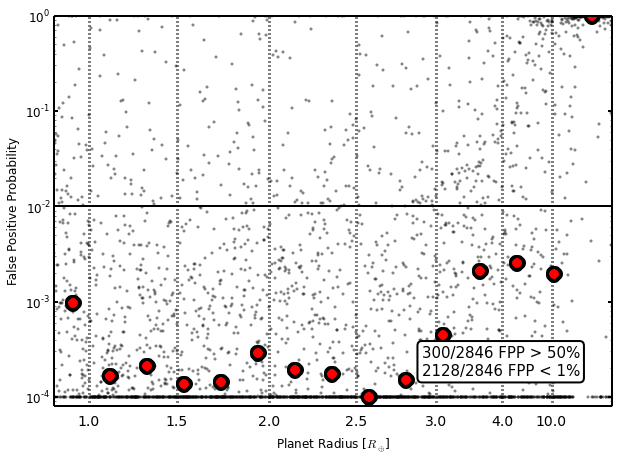

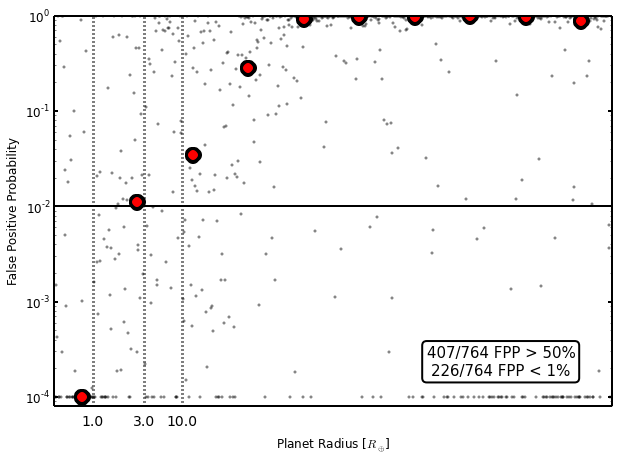

In [6]:
%matplotlib inline
plt.figure(figsize=(10,7))
fpp_summaryplot(d.query('disposition != "FALSE POSITIVE" and pos_prob_score > 0.3 and L_tot > 1e-10 and prob_ontarget > 0.99'));
plt.figure(figsize=(10,7))
fpp_summaryplot(d.query('(disposition == "FALSE POSITIVE") and prob_ontarget > 0.99 and L_tot > 1e-10'),
               nbins=10, markrs=[1,3,10]);

In [7]:
from keputils import koiutils as ku
from keputils import kicutils as kicu

starprops = pd.read_table('starprops_all.txt', delim_whitespace=True)
starprops['koistar'] = starprops['koi'].apply(ku.koistar)

sp = starprops.groupby('koistar').first()

huber_sp = kicu.DATA.ix[ku.DATA.ix[sp['koi'], 'kepid']]

                        
len(starprops), len(sp), len(huber_sp)


(8672, 7417, 7417)

In [8]:
sp.count()

koi               7417
mass              7417
mass_lo           7417
mass_hi           7417
radius            7417
radius_lo         7417
radius_hi         7417
Teff              7417
Teff_lo           7417
Teff_hi           7417
logg              7417
logg_lo           7417
logg_hi           7417
feh               7417
feh_lo            7417
feh_hi            7417
age               7417
age_lo            7417
age_hi            7417
distance          7417
distance_lo       7417
distance_hi       7417
AV                7417
AV_lo             7417
AV_hi             7417
maxAV             7417
Teff_prior_mu      450
Teff_prior_sig     450
logg_prior_mu      450
logg_prior_sig     450
feh_prior_mu       450
feh_prior_sig      450
dtype: int64

In [9]:
huber_sp.columns

Index([u'kepid', u'tm_designation', u'teff', u'teff_err1', u'teff_err2', u'logg', u'logg_err1', u'logg_err2', u'feh', u'feh_err1', u'feh_err2', u'mass', u'mass_err1', u'mass_err2', u'radius', u'radius_err1', u'radius_err2', u'dens', u'dens_err1', u'dens_err2', u'prov_sec', u'kepmag', u'nconfp', u'nkoi', u'ntce', u'datalink_dvr', u'st_delivname', u'st_vet_date_str', u'ra', u'ra_str', u'dec', u'dec_str', u'st_quarters', u'teff_prov', u'logg_prov', u'feh_prov', u'jmag', u'jmag_err', u'hmag', u'hmag_err', u'kmag', u'kmag_err', u'dutycycle', u'dataspan', u'mesthres01p5', u'mesthres02p0', u'mesthres02p5', u'mesthres03p0', u'mesthres03p5', u'mesthres04p5', u'mesthres05p0', u'mesthres06p0', u'mesthres07p5', u'mesthres09p0', u'mesthres10p5', u'mesthres12p0', u'mesthres12p5', u'mesthres15p0', u'rrmscdpp01p5', u'rrmscdpp02p0', u'rrmscdpp02p5', u'rrmscdpp03p0', u'rrmscdpp03p5', u'rrmscdpp04p5', u'rrmscdpp05p0', u'rrmscdpp06p0', u'rrmscdpp07p5', u'rrmscdpp09p0', u'rrmscdpp10p5', u'rrmscdpp12p0', u'

In [10]:
sp.columns

Index([u'koi', u'mass', u'mass_lo', u'mass_hi', u'radius', u'radius_lo', u'radius_hi', u'Teff', u'Teff_lo', u'Teff_hi', u'logg', u'logg_lo', u'logg_hi', u'feh', u'feh_lo', u'feh_hi', u'age', u'age_lo', u'age_hi', u'distance', u'distance_lo', u'distance_hi', u'AV', u'AV_lo', u'AV_hi', u'maxAV', u'Teff_prior_mu', u'Teff_prior_sig', u'logg_prior_mu', u'logg_prior_sig', u'feh_prior_mu', u'feh_prior_sig'], dtype='object')

In [11]:
from keputils import koiutils as ku
from keputils import kicutils as kicu
import numpy as np
import pandas as pd

from keputils import koiutils as ku
from keputils import kicutils as kicu

starprops = pd.read_table('starprops_all.txt', delim_whitespace=True)
starprops['koistar'] = starprops['koi'].apply(ku.koistar)

sp = starprops.groupby('koistar').first()

huber_sp = kicu.DATA.ix[ku.DATA.ix[sp['koi'], 'kepid']]

vspace = {'Teff':500, 'radius':0.3, 'feh':0.2}

def huber_compare(data=sp, prop='Teff', query='teff > 0', range=None, height=500, pix_width=2,
                 lw=0.5, ylim=None, huber_color='b'):
    
    huber_df = huber_sp.query(query.lower())
    
    huber_values = np.sort(huber_df[prop.lower()])
    sorted_inds = np.argsort(huber_df[prop.lower()])
    
    huber_values_lo = np.array(huber_df[prop.lower()] + huber_df['{}_err2'.format(prop.lower())])[sorted_inds]
    huber_values_hi = np.array(huber_df[prop.lower()] + huber_df['{}_err1'.format(prop.lower())])[sorted_inds]
    
    kics = huber_df.index[sorted_inds]
    inds = np.arange(len(huber_values))

    plt.figure(figsize=(14,5))
    ax = plt.gca()
    ax.plot(inds, huber_values, color=huber_color, marker='_', ls='none')
    ax.fill_between(inds, huber_values_lo, huber_values_hi, 
                     facecolor=huber_color, alpha=0.1, color=huber_color)
    #plt.plot(inds, huber_values_lo, marker='_', ls='none', color='k', alpha=0.5)
    #plt.plot(inds, huber_values_hi, marker='_', ls='none', color='k', alpha=0.5)
    
    
    df = data.copy()
    df.index = ku.DATA.ix[df['koi'], 'kepid']
    
    n_inconsistent = 0
    
    for i, kic in enumerate(kics):

        val_hi = df.ix[kic, '{}_hi'.format(prop)]
        val_lo = df.ix[kic, '{}_lo'.format(prop)]
        val = df.ix[kic, prop]
        
        val_huber = huber_df.ix[kic, prop.lower()]
        
        huber_lo = val_huber + huber_df.ix[kic, '{}_err2'.format(prop.lower())]
        huber_hi = val_huber + huber_df.ix[kic, '{}_err1'.format(prop.lower())]
        
        if val_lo < huber_hi and val_hi > huber_lo:
            color = 'k'
            alpha = 0.3
        else:
            color = 'r'
            alpha = 0.5
            ax.plot(i, val, marker='_', color='r', alpha=0.5, ms=3)
            n_inconsistent += 1
            
        ax.plot([i,i], [val_lo, val_hi], color=color, alpha=alpha, lw=lw)
    
    if ylim is None:
        ylim = (huber_values.min() - vspace[prop], huber_values.max() + vspace[prop])
    ax.set_ylim(ylim)
    ax.set_xticks([])
    N = len(kics)
    
    ax.annotate('{}/{} inconsistent ({:.1f}%)'.format(n_inconsistent, N, float(n_inconsistent)/N*100),
                xy=(0.03,0.95), xycoords='axes fraction', fontsize=14, bbox=dict(boxstyle='round',fc='w',lw=2),
                ha='left', va='top', color='r')
    ax.set_xlim(xmax=inds[-1])
    ax.yaxis.grid(True)


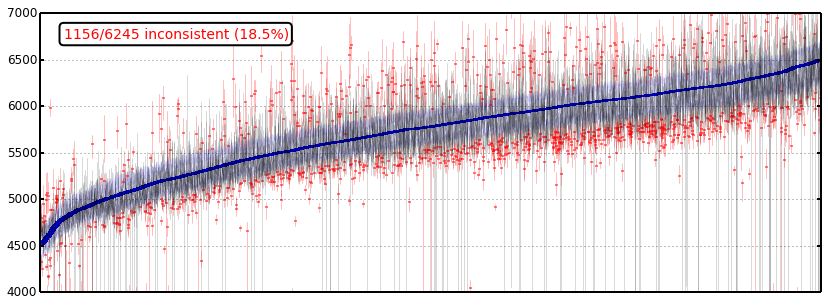

In [12]:
huber_compare(query='4500 < teff < 6500')
plt.savefig('teff_compare_huber.png')

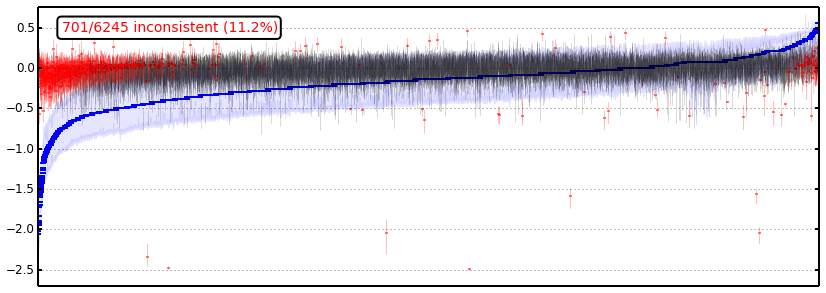

In [13]:
huber_compare(query='4500 < teff < 6500', prop='feh')

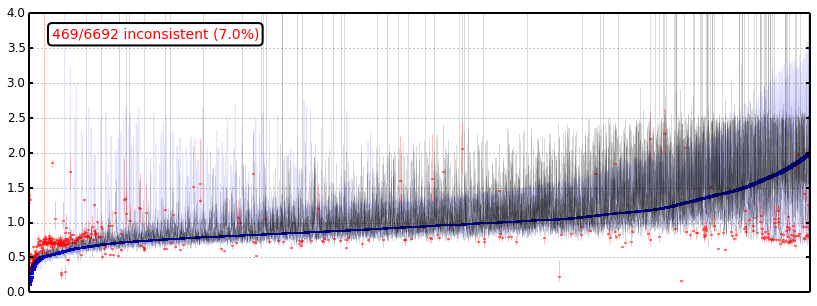

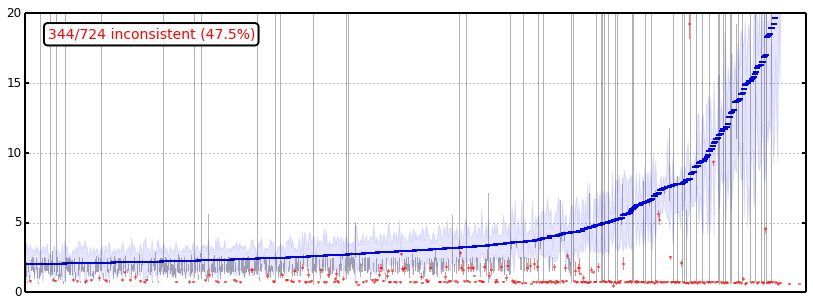

In [14]:
huber_compare(prop='radius', query='radius < 2', ylim=(0,4));
huber_compare(prop='radius', query='2 < radius', ylim=(0,20), lw=1)

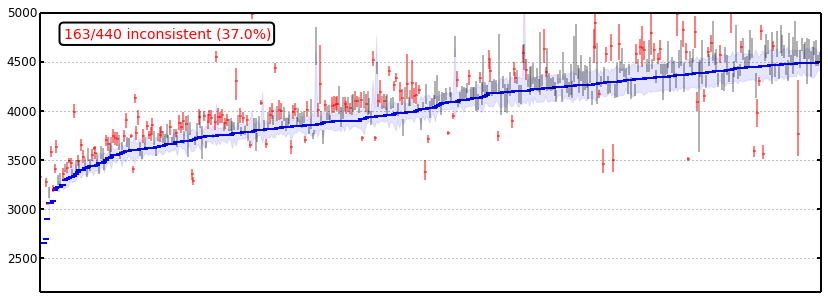

In [15]:
huber_compare(query='teff < 4500', lw=2)

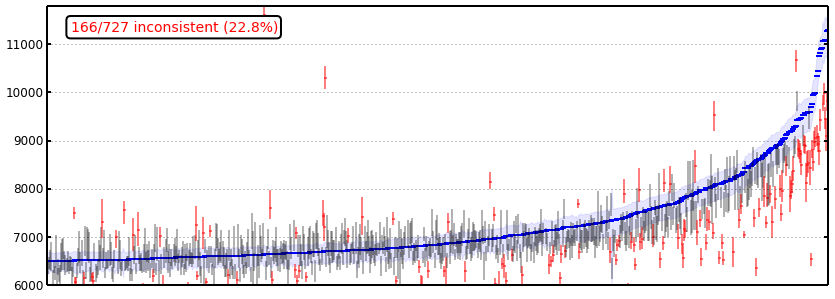

In [17]:
huber_compare(query='6500 < teff', lw=2)